
# Project: Investigate a Dataset - TMDb Movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
*The movies dataset describes the information of 10,866 movies from The Movie Database (TMDb) from the years 1966 to 2015. In the Original dataset, there are 21 columns describing various characteristics of the each movie. The Columns in their order and the properties they describe include:*
   **<br> id - The special characteristic identification number of the movie
    <br>2 imdb_id - Special identifier of the movie
    <br>3 popularity - 
    <br>4 budget - budget allocated for the movie
    <br>5 revenue - revenue generated from the movie
    <br>6 original_title - original title of the movie
    <br>7 cast - the characters featured in the movie
    <br>8 homepage - url to webpage of the movie
    <br>9 director - director of the movie
    <br>10 tagline -
    <br>11 keywords - keywords associated with movie
    <br>12 overview - a brief description of the movie
    <br>13 runtime - duration of movie
    <br>14 genres - genres of the movie
    <br>15 production_companies -
    <br>16 release_date - date the movie was released
    <br>17 vote_count - vote count of movie
    <br>18 vote_average - vote average of movie
    <br>19 release_year - the year the movie was released
    <br>20 budget_adj - the allocated budget according to 2010 US dollars
    <br>21 revenue_adj - the realised revenue according to 2010 US dollars**

### Question(s) for Analysis
*In this analysis, the aim is to understand some the trend of profit generated over the years in the movie industry and also to spot some of the parameters associated with high-revenue generating movies. In the process of exploring the data, the following questions will be asked:*
<br>**1 What Genres of movies are most popular from year to year?
<br>  2 Which Production company produced the most movies
<br>  3 Which casts had the highest appearance in movies in the dataset
<br>  4 Which movies had revenues that exceeded their budgets?
 <br> 5 What is the trend in profit from 1960 till 2015?
 <br> 6 Is there a Relationship between budget and Revenue?
 <br> 7 Is there a relationship between the Director of a movie and the vote average of the movie?**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling


In [32]:
#Loading the data
df=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**There are certain columns that are not required for this analysis, hence they have to be dropped**

In [33]:
#drop columns not used for the analysis
df.drop(['id','imdb_id','homepage','overview','keywords','tagline'],axis=1,inplace=True)

**Checking for missing values**

In [35]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**the production_companies column seem to have a lot of missing values. Since this column will be used for the analysis, we cannot drop it, so I dropped the missing values instead**


In [36]:
#droping missing values
df.dropna(axis=0,inplace=True)

In [38]:
#checking for duplicated rows
df.duplicated().sum()

1

In [39]:
#droping duplicated rows
df.drop_duplicates(inplace=True)

In [27]:
def fill_mean(df):
    df.replace(0,np.nan,inplace=True)
    return df.fillna(df.mean(),inplace=True)
#Calling the function on the dataframe
fill_mean(df)

In [29]:
#We would have to drop the rows with missing values
df.dropna(axis=0,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


In [26]:
#checking for an overview of the descriptive statistics of the data
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**There seems to be zero(0) values in the revenue and budget_adj columns. In the analysis process, I wrote a function to fill them with the mean of the data**

In [40]:
def fill_mean(df):
    df.replace(0,np.nan,inplace=True)
    return df.fillna(df.mean(),inplace=True)

In [41]:
#Calling the function on the dataframe
fill_mean(df)

**In order to observe the general description of the data, I plotted a histogram of the various data. The charts are represented below**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f733d60b748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f733d825f60>]], dtype=object)

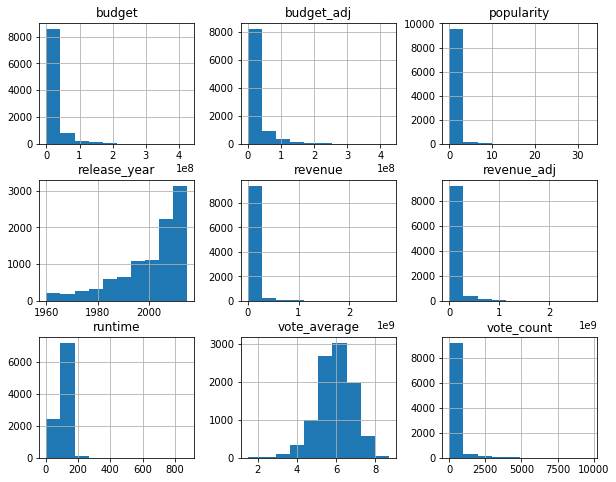

In [42]:
#we create a histogram of the data to understand the general distribution
df.hist(figsize=(10,8))

### Research Question 1
#### What Genres of movies are most popular from year to year

In [45]:
#In order to extract the values separated by a pipe (|), I used the str.cat() function

#since I will be using this method in separating columns with pipe, I wrote a function to avoid repition

def pipe_separator(df):
    return pd.Series(df.str.cat(sep='|').split('|'))

In [48]:
#calling the function on the genres column
genres=pipe_separator(df['genres'])

#displaying to confirm the function
genres.head()

0             Action
1          Adventure
2    Science Fiction
3           Thriller
4             Action
dtype: object

Text(0.5,1,'Plot of Occurence of Genres from 1960 to 2015')

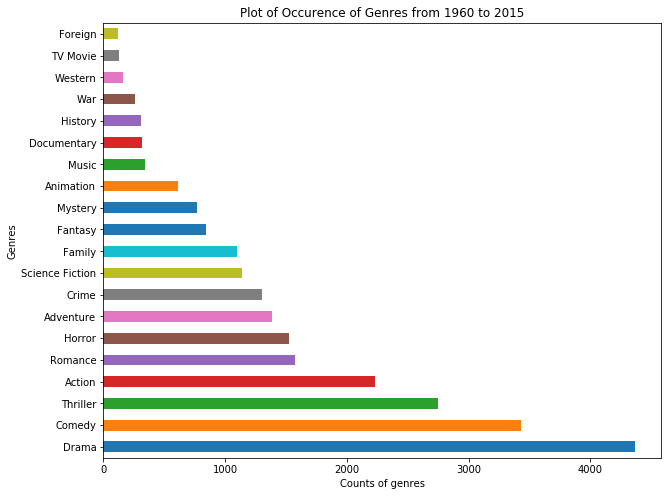

In [49]:
#Creating the plot
genres.value_counts().plot(kind='barh',figsize=(10,8))
plt.xlabel('Counts of genres')
plt.ylabel('Genres')
plt.title('Plot of Occurence of Genres from 1960 to 2015')

##### Drama had the highest occurence. This is followed by Comedy. This would mean movies which had drama and comedy are more produced.

### Research Question 2
#### Which production companies produced the most movies?

In [51]:
#since the production companies are also separated by pipes, I called the pipe function
production_companies=pipe_separator(df['production_companies'])

#displaying to confirm the function
production_companies.head()

0          Universal Studios
1       Amblin Entertainment
2         Legendary Pictures
3    Fuji Television Network
4                     Dentsu
dtype: object

Text(0.5,1,'TOP 5 PRODUCTION COMPANIES')

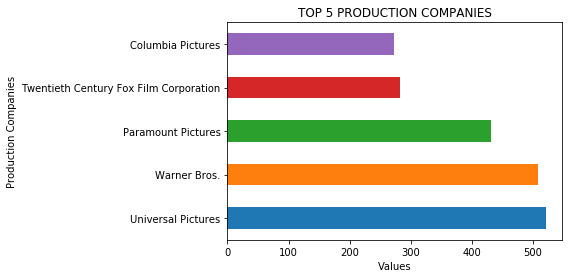

In [60]:
#creating the plot
production_values=production_companies.value_counts().head()
production_values.plot(kind='barh')
plt.xlabel('Values')
plt.ylabel('Production Companies')
plt.title('TOP 5 PRODUCTION COMPANIES')

##### Universal Pictures and Warner Bros Produced the most movies. 

### Research Question 3
#### Which casts had the highest appearance in movies in the dataset

Text(0.5,1,'TOP 5 CASTS')

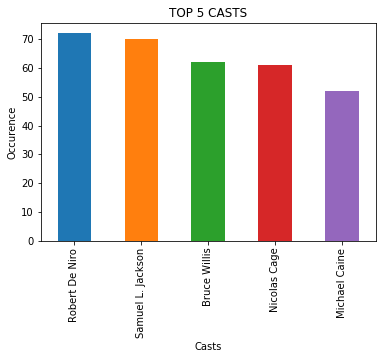

In [65]:
#the cast column also had values separated by pipe. so I called the pipe_separator function to extract the values

#calling the function
cast=pipe_separator(df['cast'])
cast_values=cast.value_counts().head()
cast_values.plot(kind='bar')
plt.xlabel('Casts')
plt.ylabel('Occurence')
plt.title('TOP 5 CASTS')

### Research Question 4
#### Which movies had revenues that exceeded their budgets?

In [66]:
#for this question, I selected only columns that are useful for this analysis
df_movies=df[['budget_adj','revenue_adj','release_year']]

#viewing the dataset to confirm
df_movies.head()

,budget_adj,revenue_adj,release_year
0,1.379999e+08,1.392446e+09,2015
1,1.379999e+08,3.481613e+08,2015
2,1.012000e+08,2.716190e+08,2015
3,1.839999e+08,1.902723e+09,2015
4,1.747999e+08,1.385749e+09,2015


In [67]:
#I created another column (profit/loss) to determine if budget exceeded revenue or not
df_movies['profit/loss']=df_movies['revenue_adj']-df_movies['budget_adj']

#viewing the data to confirm
df_movies.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,budget_adj,revenue_adj,release_year,profit/loss
0,1.379999e+08,1.392446e+09,2015,1.254446e+09
1,1.379999e+08,3.481613e+08,2015,2.101614e+08
2,1.012000e+08,2.716190e+08,2015,1.704191e+08
3,1.839999e+08,1.902723e+09,2015,1.718723e+09
4,1.747999e+08,1.385749e+09,2015,1.210949e+09


In [68]:
df_loss=df_movies[df_movies['profit/loss']<=0]
len(df_loss)

1765

In [69]:
df_profit=df_movies[df_movies['profit/loss']>0]
len(df_profit)

8007

**From the above, we see that we had 8014 movies in profit and 1758 movies in loss.
So I created a chart to visualize.
<br> Firstly, I wrote a function that mapped the profit/loss column to return profit if the value was greater than 0 or loss if it was less than 0 to know the companies that loss and those in profit**

In [70]:
#this function returns profit or loss
def rename_profit_loss(df):
    if df>0:
        return 'Profit'
    else:
        return 'Loss'

In [71]:
#calling the function
df_movies['status']=df_movies['profit/loss'].map(rename_profit_loss)

#checking the data to confirm
df_movies.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,budget_adj,revenue_adj,release_year,profit/loss,status
0,1.379999e+08,1.392446e+09,2015,1.254446e+09,Profit
1,1.379999e+08,3.481613e+08,2015,2.101614e+08,Profit
2,1.012000e+08,2.716190e+08,2015,1.704191e+08,Profit
3,1.839999e+08,1.902723e+09,2015,1.718723e+09,Profit
4,1.747999e+08,1.385749e+09,2015,1.210949e+09,Profit


Text(0.5,0,'Status, Profit or Loss')

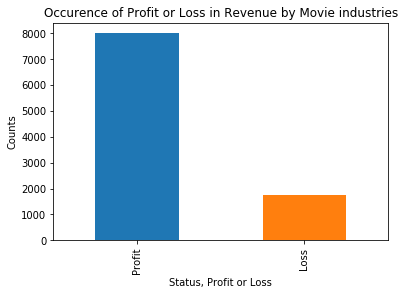

In [72]:
#creating the plot
df_movies['status'].value_counts().plot.bar()
plt.title('Occurence of Profit or Loss in Revenue by Movie industries')
plt.ylabel('Counts')
plt.xlabel('Status, Profit or Loss')

##### Observation
##### There were more companies in profit than loss.

### Research Question 5
#### What is the trend in profit from 1960 till 2015?

In [74]:
#In order to get the trend, I created a moving average chart of the profit trend

#I used the data created from the previous question

#firstly, I grouped the data by the release_year

df_profit_trend=df_movies.groupby('release_year')['profit/loss'].mean().to_frame()

#checking to confirm data
df_profit_trend.head()

,profit/loss
release_year,
1960,9.286565e+07
1961,1.277376e+08
1962,1.006589e+08
1963,9.153468e+07
1964,1.185194e+08


In [75]:
#creating moving average
#since i used the moving average alot, I created a function for it

def moving_average(df,n):
    return df.rolling(n).mean()

In [77]:
#calling the moving average function
df_profit_trend['moving_average']=moving_average(df_profit_trend['profit/loss'],7)

#checking to confirm
df_profit_trend.head(7)

,profit/loss,moving_average
release_year,,
1960,9.286565e+07,NaN
1961,1.277376e+08,NaN
1962,1.006589e+08,NaN
1963,9.153468e+07,NaN
1964,1.185194e+08,NaN
1965,1.535008e+08,NaN
1966,8.070344e+07,1.093601e+08


<function matplotlib.pyplot.show(*args, **kw)>

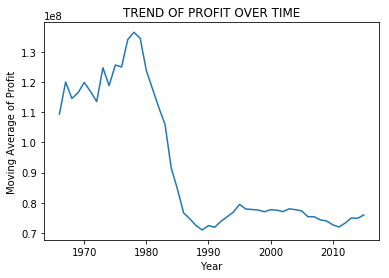

In [78]:
#creating the plot
x=df_profit_trend.index
y=df_profit_trend['moving_average']
plt.plot(x,y)
plt.xlabel('Year')
plt.ylabel('Moving Average of Profit')
plt.title('TREND OF PROFIT OVER TIME')
plt.show

##### Observation
##### The movie industry is losing as compared to earlier times. But could a reversal be imminent as observed in the rise at 2010?? From the chart, we observe that the trend is a downtrend. And there seems to be a pattern. The Revenue peaked somewhere around 1980 and there was a quick reversal afterwards. The sharp fall from 1980 to 1990 might be due to certain reasons which are not provided in this dataset. However, it seems that the trend is reversing and the movie industry would experience some rise in revenue

### Research Question 6
#### Is there a Relationship between budget and Revenue?

In [79]:
#I attempted to answer this question by plotting a line chart and a regression line to see the correlation

#first, let us get the data that we need
df_relationship=df[['release_year','budget_adj','revenue_adj']]
df_relationship=df_relationship.groupby('release_year')['budget_adj','revenue_adj'].mean()

#view data to confirm
df_relationship.head()

,budget_adj,revenue_adj
release_year,,
1960,3.224209e+07,1.251077e+08
1961,3.263191e+07,1.603695e+08
1962,3.330227e+07,1.339611e+08
1963,4.091927e+07,1.324539e+08
1964,3.441986e+07,1.529393e+08


Text(0.5,1,'TREND OF BUDGET AND REVENUE OVER TIME')

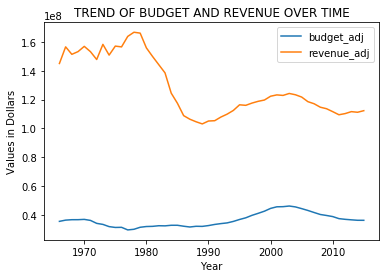

In [80]:
#calculating the moving averages to plot
#I called the function created
df_relationship['budget_adj']=moving_average(df_relationship['budget_adj'],7)
df_relationship['revenue_adj']=moving_average(df_relationship['revenue_adj'],7)
df_relationship.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Values in Dollars')
plt.title('TREND OF BUDGET AND REVENUE OVER TIME')

##### Observation
##### We notice that the trend is smooth for Budget showing with some slight rise somewhere around year 2000. This rise caused a concomitant rise in revenue from the same time.

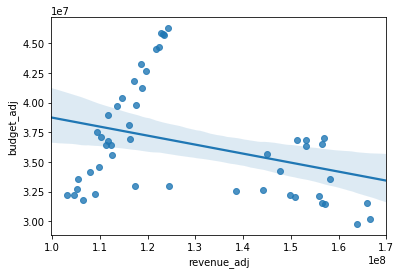

In [81]:
#Next, I plotted a regression line
sns.regplot(x='revenue_adj',y='budget_adj',data=df_relationship)

##### This relationship surprisingly is a negative correlation signifying an inrease in Revenue as Budget Reduces This challenge might probably be as a result of the Missing Values filled with the mean of the data in the data wrangling process

### Research Question 7
#### Is there a relationship between the Director of a movie and the vote average of the movie?

Text(0,0.5,'Director')

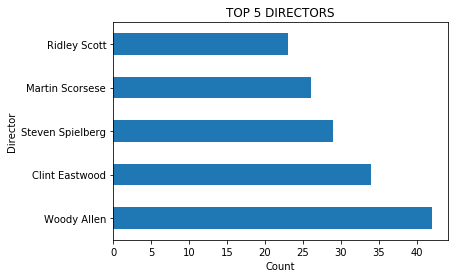

In [82]:
#I extracted the data necessary to answer this question
df_vote=df[['director','vote_average']]
top_5=df_vote['director'].value_counts().to_frame().head()
top_5.plot.barh(legend=None)
plt.title('TOP 5 DIRECTORS')
plt.xlabel('Count')
plt.ylabel('Director')

In [84]:
#Next, I viewed the data to see the movies with the highest average and compare if they had one of the top 5 directors
df_vote.groupby('director')['vote_average'].mean().sort_values(ascending=False).head()

director
David Mallet                            8.7
Saul Swimmer                            8.5
Martin Scorsese|Michael Henry Wilson    8.5
Curt Morgan                             8.5
Jorge RamÃ­rez SuÃ¡rez                  8.4
Name: vote_average, dtype: float64

##### The data above throws doubts on the correlation about the volume of movies produced and the vote average. Only one of the Top 5 producers featured among the directors with the highest vote_average ratings (Martin Scorsese)

<a id='conclusions'></a>
## Conclusions

> **In this analysis, many insights were revealed concerning the data. I observed that the revenue generated from movie has witnessed a drastic drop since 1980. However, there might be an imminent reversal as shown in the charts. Appropriate studies and modelling is necessary to understand know the appropriate funding necessary to make a movie stand out. The relationship observed between budget and revenue seem to suggest that the higher the budget, the lower the revenue generated. It is probable that this information is as a result of the data cleaning process. Some of the values in the revenue and budget column were missing, hence I had to replace with the mean of the dataset. This probably might have affected the output.**

> **It is probable (subject to further analysis and verificaton) that movies produced by Universal Pictures, have casts such as Robert de Niro, and directed by Wooden Allen, would make a terrific movie.**


In [85]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0